In [1]:
import numpy as np

In [2]:
class ScratchLogisticRegression():
    def __init__(self, num_iter, lr, no_bias, verbose,lam):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = no_bias
        self.verbose = verbose
        self.lam = lam
        self.theta = np.array([])
        self.loss = np.array([])
        self.val_loss = np.array([])

    def fit(self, X, y, X_val, y_val):
        """train"""
        if self.bias == True:
            bias = np.ones((X.shape[0], 1))
            X = np.hstack((bias, X))
            bias = np.ones((X_val.shape[0], 1))
            X_val = np.hstack((bias, X_val))
            
        self.theta = np.zeros(X.shape[1])
        self.theta = self.theta.reshape(X.shape[1], 1)
        
        for i in range(self.num_iter):
            pred = self._logistic_hypothesis(X)
            pred_val = self._logistic_hypothesis(X_val)
            self._gradient_descent(X, y)
            loss = self._loss_func(pred, y)
            self.loss = np.append(self.loss, loss)
            loss_val = self._loss_func(pred_val, y_val)
            self.val_loss = np.append(self.val_loss, loss_val)
            if self.verbose == True:
                print('{}-th iter training loss = {}'.format(i,loss))

    def _gradient_descent(self, X, y):
        m = X.shape[0]
        n = X.shape[1]
        pred = self._logistic_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient += (pred[i] - y[i]) * X[i, j]
            self.theta[j] = self.theta[j] - self.lr * ((gradient+self.lam*self.theta[j]) / m)
     
    def _sigmoid(self,y):
         return 1 / (1 + np.exp(-y))
        
    def _logistic_hypothesis(self, X):
        pred = X @ self.theta
        pred = self._sigmoid(pred)
        return pred
       
    def predict(self, X):
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        return np.where(self._logistic_hypothesis(X) >= 0.5,1,0)

    def predict_proba(self, X):
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        pred = self._logistic_hypothesis(X)
        return pred
        
    def _loss_func(self, pred, y):
        error = 0
        for i in range(y.shape[0]):
            error += -np.sum(y[i] *  np.log(pred[i])+(1-y[i]) *  np.log(1-pred[i]))
        loss = error / (y.shape[0])
        loss = loss + np.sum(self.theta**2)*self.lam/(2 * y.shape[0])
        return loss

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[:100,:]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

In [4]:
slr = ScratchLogisticRegression(num_iter=50, lr=0.01, no_bias=True, verbose=True, lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)

0-th iter training loss = 0.6931472170092376
1-th iter training loss = 0.6874032448495015
2-th iter training loss = 0.6819731898170039
3-th iter training loss = 0.6767932175197978
4-th iter training loss = 0.6718143443244332
5-th iter training loss = 0.6669989920204508
6-th iter training loss = 0.6623183253817646
7-th iter training loss = 0.6577502028299625
8-th iter training loss = 0.6532776033555232
9-th iter training loss = 0.6488874212943886
10-th iter training loss = 0.6445695441008179
11-th iter training loss = 0.640316147233864
12-th iter training loss = 0.6361211553013686
13-th iter training loss = 0.6319798303612513
14-th iter training loss = 0.6278884574005626
15-th iter training loss = 0.6238441040482184
16-th iter training loss = 0.6198444369827012
17-th iter training loss = 0.6158875816377464
18-th iter training loss = 0.6119720149768104
19-th iter training loss = 0.6080964835271806
20-th iter training loss = 0.6042599407121654
21-th iter training loss = 0.6004614989297895

In [5]:
pred = slr.predict_proba(X_test)

In [6]:
pred

array([[0.60239488],
       [0.62599209],
       [0.59957331],
       [0.64117826],
       [0.63140396],
       [0.64655638],
       [0.41546428],
       [0.44630446],
       [0.42090365],
       [0.66598949],
       [0.43039835],
       [0.46772287],
       [0.63719596],
       [0.4053084 ],
       [0.44791555],
       [0.66397998],
       [0.62777614],
       [0.426511  ],
       [0.66959802],
       [0.42148805]])

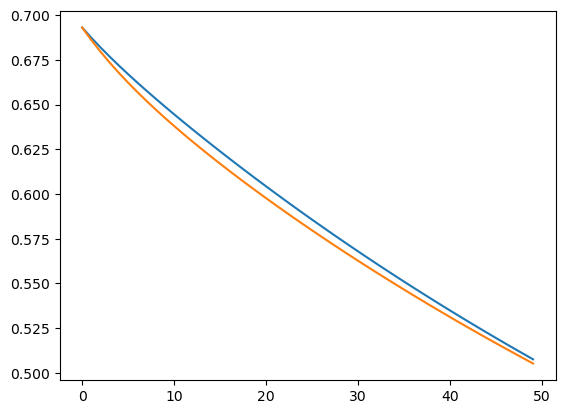

In [7]:
import matplotlib.pyplot as plt

plt.plot(slr.loss)
plt.plot(slr.val_loss)
plt.show()

Decision Boundry

In [8]:
X = iris.data[:100,:2]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

slr = ScratchLogisticRegression(num_iter=1000, lr=0.005, no_bias=True,verbose=False, lam = 0.5)
slr.fit(X_train, y_train, X_test, y_test)

In [9]:
from matplotlib.colors import ListedColormap

def decision_region(X,y,slr):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()

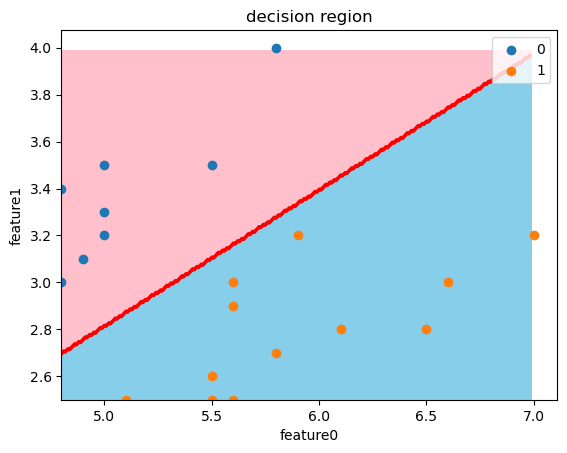

In [10]:
decision_region(X_test,y_test, slr)

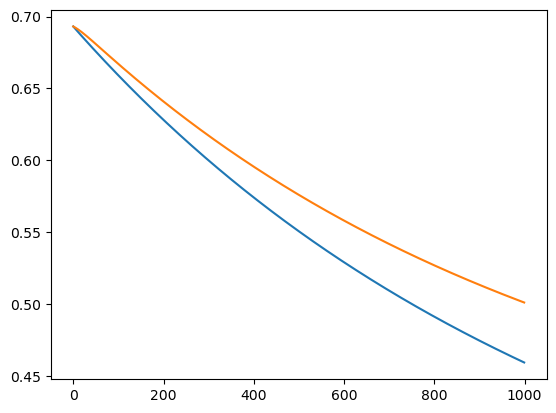

In [12]:
plt.plot(slr.loss)
plt.plot(slr.val_loss)
plt.show()